In [2]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import talib

In [3]:
f = open('../data/UNI/SPY-1d.csv', 'r')
data = np.array(list(csv.reader(f)))
dt = data[:, 0].astype(np.datetime64)
op = data[:, 1].astype(np.float64)
hi = data[:, 2].astype(np.float64)
lo = data[:, 3].astype(np.float64)
cl = data[:, 4].astype(np.float64)
vol = data[:, 5].astype(np.float64)

In [35]:
ret_data = []
for i in range(1, cl.shape[0]):
    ret = (cl[i] - cl[i - 1]) / cl[i - 1]
    ret_data.append(ret)
ret_data = np.array(ret_data)

In [36]:
split = 10
train, test = ret_data[:-split], ret_data[-split:]

In [37]:
model = arch_model(train, 'AR', vol='GARCH', p=30, q=30)
model_fit = model.fit()

Iteration:      1,   Func. Count:     64,   Neg. LLF: -12325.157684910431
Iteration:      2,   Func. Count:    136,   Neg. LLF: -12325.27414858178
Iteration:      3,   Func. Count:    207,   Neg. LLF: -12325.274476432223
Iteration:      4,   Func. Count:    278,   Neg. LLF: -12325.275587324097
Iteration:      5,   Func. Count:    349,   Neg. LLF: -12325.276176967043
Iteration:      6,   Func. Count:    420,   Neg. LLF: -12325.276498861233
Iteration:      7,   Func. Count:    492,   Neg. LLF: -12325.27728061674
Iteration:      8,   Func. Count:    562,   Neg. LLF: -12325.277972735319
Iteration:      9,   Func. Count:    630,   Neg. LLF: -12326.019100999933
Iteration:     10,   Func. Count:    702,   Neg. LLF: -12326.877065472887
Iteration:     11,   Func. Count:    773,   Neg. LLF: -12326.877204075612
Iteration:     12,   Func. Count:    844,   Neg. LLF: -12326.877507406503
Iteration:     13,   Func. Count:    914,   Neg. LLF: -12326.881932704277
Iteration:     14,   Func. Count:    986

In [38]:
yhat = model_fit.forecast(horizon=split)

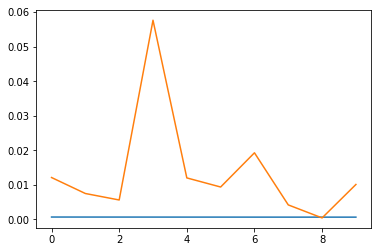

In [40]:
plt.plot(yhat.variance.values[-1, :])
plt.plot(np.abs(test))
plt.show()